<a href="https://colab.research.google.com/github/bala-24g/Brain_tumour_classification/blob/main/brain_tumour_pretrained_models_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201, EfficientNetB5, InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D


In [ ]:
import os

# Path to your data directory
data_dir = r"C:\Users\nezes\Documents\Github_projects\Brain_tumour\archive"

# Check for classes based on folder structure
train_dir = os.path.join(data_dir, 'Training')
test_dir = os.path.join(data_dir, 'Testing')

# List classes based on subdirectories
train_classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
test_classes = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])

print("Train Classes:", train_classes)
print("Test Classes:", test_classes)

# Check that the classes are consistent between train and test
if train_classes != test_classes:
    print("Warning: Train and Test directories have different classes.")
else:
    print("Classes match in both Train and Test directories.")


Train Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Test Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Classes match in both Train and Test directories.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image resizing based on model input requirements
image_size = (229, 229)  # Adjust as needed for your CNN model

# Data generators with validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Displaying the class indices used by ImageDataGenerator
print("Class indices:", train_generator.class_indices)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:
def load_model(model_name):
    if model_name == 'DenseNet201':
        base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=image_size + (3,))
    elif model_name == 'EfficientNetB5':
        base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=image_size + (3,))
    elif model_name == 'InceptionResNetV2':
        base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=image_size + (3,))
    else:
        raise ValueError("Model not supported")

    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))
    return model

# Example: Extract features from DenseNet201
model_name = 'DenseNet201'
feature_extractor = load_model(model_name)


In [ ]:
def extract_features(generator, model):
    features = []
    labels = []

    for images, lbls in generator:
        features_batch = model.predict(images)
        features.append(features_batch)
        labels.append(lbls)

        # Break after going through one epoch
        if generator.batch_index == 0:
            break

    features = np.concatenate(features)
    labels = np.concatenate(labels)
    return features, labels

# Extract features for training and validation sets
train_features, train_labels = extract_features(train_generator, feature_extractor)
val_features, val_labels = extract_features(validation_generator, feature_extractor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=100)  # Choose components based on explained variance
train_features_pca = pca.fit_transform(train_features)
val_features_pca = pca.transform(val_features)


In [ ]:
# Train SVM
svm = SVC(kernel='rbf', C=10, gamma=0.0001)
svm.fit(train_features_pca, np.argmax(train_labels, axis=1))
svm_preds = svm.predict(val_features_pca)

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), learning_rate_init=0.001, max_iter=100)
mlp.fit(train_features_pca, np.argmax(train_labels, axis=1))
mlp_preds = mlp.predict(val_features_pca)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(train_features_pca, np.argmax(train_labels, axis=1))
gnb_preds = gnb.predict(val_features_pca)


In [ ]:
!pip install seaborn


Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       264
           1       0.67      0.72      0.70       267
           2       0.92      0.82      0.86       319
           3       0.82      0.94      0.88       291

    accuracy                           0.82      1141
   macro avg       0.83      0.82      0.82      1141
weighted avg       0.83      0.82      0.82      1141



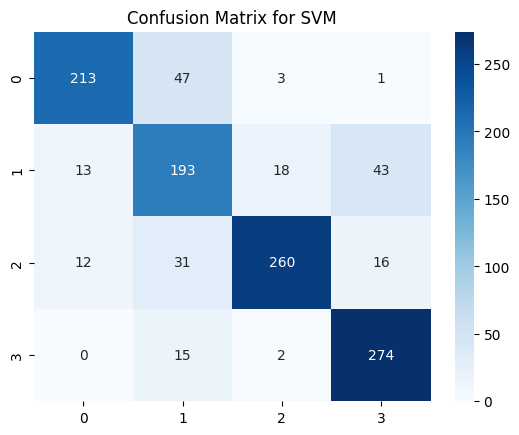

Classification Report for MLP:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       264
           1       0.82      0.85      0.83       267
           2       0.95      0.88      0.91       319
           3       0.90      0.94      0.92       291

    accuracy                           0.90      1141
   macro avg       0.90      0.90      0.90      1141
weighted avg       0.90      0.90      0.90      1141



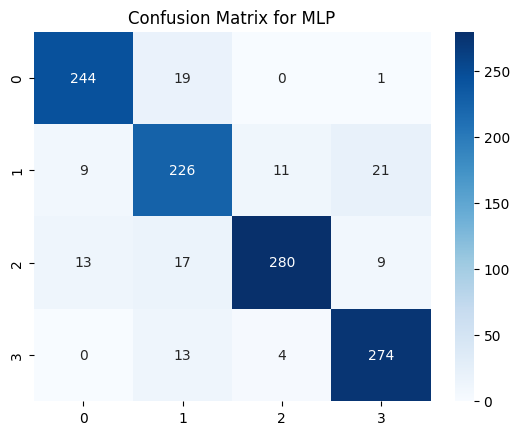

Classification Report for GNB:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78       264
           1       0.51      0.67      0.58       267
           2       0.87      0.68      0.76       319
           3       0.80      0.86      0.83       291

    accuracy                           0.73      1141
   macro avg       0.75      0.73      0.74      1141
weighted avg       0.76      0.73      0.74      1141



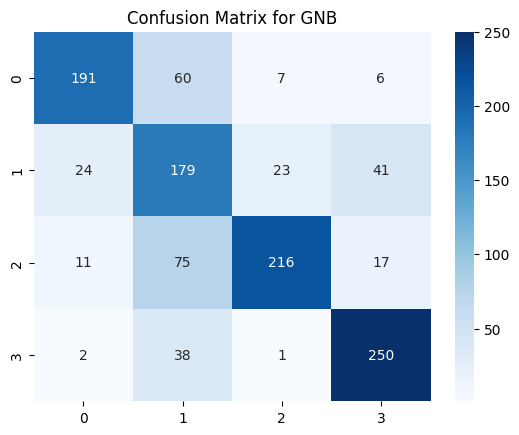

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(preds, true_labels, model_name):
    print(f"Classification Report for {model_name}:\n", classification_report(true_labels, preds))
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

true_labels = np.argmax(val_labels, axis=1)
evaluate_model(svm_preds, true_labels, "SVM")
evaluate_model(mlp_preds, true_labels, "MLP")
evaluate_model(gnb_preds, true_labels, "GNB")
